<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Genome-scale-metabolic-models" data-toc-modified-id="Genome-scale-metabolic-models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Genome-scale metabolic models</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Model-content" data-toc-modified-id="Model-content-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model content</a></span><ul class="toc-item"><li><span><a href="#Metabolites" data-toc-modified-id="Metabolites-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Metabolites</a></span></li><li><span><a href="#Reactions" data-toc-modified-id="Reactions-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Reactions</a></span></li></ul></li><li><span><a href="#Objective" data-toc-modified-id="Objective-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#ATP-maintenance-requirement" data-toc-modified-id="ATP-maintenance-requirement-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>ATP maintenance requirement</a></span></li><li><span><a href="#The-math-(scary!)" data-toc-modified-id="The-math-(scary!)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>The math (scary!)</a></span></li><li><span><a href="#Gene-Protein-Reaction-associations" data-toc-modified-id="Gene-Protein-Reaction-associations-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Gene-Protein-Reaction associations</a></span></li><li><span><a href="#Finding-things" data-toc-modified-id="Finding-things-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Finding things</a></span></li><li><span><a href="#The-stoichiometric-matrix-S" data-toc-modified-id="The-stoichiometric-matrix-S-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>The stoichiometric matrix S</a></span></li><li><span><a href="#Simulating-models" data-toc-modified-id="Simulating-models-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Simulating models</a></span></li></ul></li></ul></div>

# Genome-scale metabolic models
We are now transitioning from simple toy models to genome-scale models. Rather than build these models from scratch as we did with the ABC model, from now on, we will be loading models that have already been built. Successful development of genome-scale models nowadays really requires software engineering methodologies to manage the complexity, but that is beyond the scope of this workshop. If you are interested in learning more, I recommend you start with the following BioRxiv pre-print:

Mendoza, S. N., Olivier, B. G., Molenaar, D, Teusink, B. (bioRxiv). [A Systematic Assessment Of Current Genome-Scale Metabolic Reconstruction Tools](https://doi.org/10.1101/558411)



## Preparation

Fortunately, most of the concepts we have already learned will continue to be applicable. Nonetheless there are a few technical details about these real-world models that are worth mentioning. The first is that there is a standard for representing genome-scale models called the Systems Biology Markup Language with Flux Balance Constraints, or [SBMLv3 with the fbc package](http://sbml.org/Documents/Specifications/SBML_Level_3/Packages/Flux_Balance_Constraints_(flux)):

In [1]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/iJO1366.xml.gz')

## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [2]:
model.metabolites[0:10]

[<Metabolite 10fthf_c at 0x126d7e198>,
 <Metabolite 12dgr120_c at 0x126d6fdd8>,
 <Metabolite 12dgr140_c at 0x121a39ac8>,
 <Metabolite 12dgr141_c at 0x126d7ec18>,
 <Metabolite 12dgr160_c at 0x126d7ef98>,
 <Metabolite 12dgr161_c at 0x126d96358>,
 <Metabolite 12dgr180_c at 0x126d966d8>,
 <Metabolite 12dgr181_c at 0x126d96a58>,
 <Metabolite 12ppd__R_c at 0x126d96dd8>,
 <Metabolite 12ppd__S_c at 0x126d9d198>]

There are 1805 metabolites in the model.

In [3]:
len(model.metabolites)

1805

One can access a specific metabolite using dot notation.

In [4]:
model.metabolites.g3p_c

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x0126f0e940
Formula,C3H5O6P
Compartment,c
In 14 reaction(s),"DXPS, TALA, F6PA, EDA, TPI, TRPS1, TRPS3, DDPGALA, DRPA, TKT1, GAPD, TGBPA, TKT2, FBA"


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [5]:
model.metabolites.10fthf_c

SyntaxError: invalid syntax (<ipython-input-5-2d9f6c5b57e5>, line 1)

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [6]:
model.metabolites.get_by_id('10fthf_c')

Metabolite identifier,10fthf_c
Name,10-Formyltetrahydrofolate
Memory address,0x0126d7e198
Formula,C20H21N7O7
Compartment,c
In 9 reaction(s),"FTHFLi, MTHFC, ULA4NFT, FMETTRS, FTHFD, AICART, BIOMASS_Ec_iJO1366_WT_53p95M, GARFT, BIOMASS_Ec_iJO1366_core_53p95M"


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [7]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [8]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [9]:
model.metabolites.glc__D_c.compartment

'c'

In [10]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [11]:
model.metabolites.glc__D_c.name

'D-Glucose'

One can look up the molecular formula of glucose.

In [12]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [13]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [14]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [15]:
model.metabolites.g3p_c.annotation

{'sbo': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'seed.compound': 'cpd00102',
 'metanetx.chemical': 'MNXM2378',
 'kegg.compound': ['C00118', 'C00661'],
 'hmdb': 'HMDB01112',
 'chebi': ['CHEBI:12983',
  'CHEBI:12984',
  'CHEBI:14333',
  'CHEBI:17138',
  'CHEBI:181',
  'CHEBI:18324',
  'CHEBI:21026',
  'CHEBI:29052',
  'CHEBI:5446',
  'CHEBI:58027',
  'CHEBI:59776'],
 'unipathway.compound': ['UPC00118', 'UPC00661'],
 'biocyc': 'META:GAP',
 'reactome': '29578'}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [16]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction DDPGALA at 0x127b356a0>,
           <Reaction DRPA at 0x127bc06a0>,
           <Reaction DXPS at 0x127bfb438>,
           <Reaction EDA at 0x127c49940>,
           <Reaction F6PA at 0x127ae88d0>,
           <Reaction FBA at 0x127cdc7f0>,
           <Reaction GAPD at 0x127e07748>,
           <Reaction TALA at 0x128811470>,
           <Reaction TGBPA at 0x1285ad390>,
           <Reaction TKT1 at 0x12886ab38>,
           <Reaction TKT2 at 0x12886afd0>,
           <Reaction TPI at 0x12886a940>,
           <Reaction TRPS1 at 0x12883b160>,
           <Reaction TRPS3 at 0x128811e48>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [17]:
model.reactions[0:10]

[<Reaction DM_4crsol_c at 0x127490a20>,
 <Reaction DM_5drib_c at 0x127490e10>,
 <Reaction DM_aacald_c at 0x1274b42b0>,
 <Reaction DM_amob_c at 0x1274b4358>,
 <Reaction DM_mththf_c at 0x1274b44a8>,
 <Reaction DM_oxam_c at 0x1274b4588>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x1274b46d8>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x1274aabe0>,
 <Reaction EX_12ppd__R_e at 0x1274d87f0>,
 <Reaction EX_12ppd__S_e at 0x1274b4ba8>]

There are 2583 reactions in the model.

In [18]:
len(model.reactions)

2583

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [19]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction.id, reaction, reaction.name)

DXPS DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase
TALA TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
F6PA F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
EDA EDA: 2ddg6p_c --> g3p_c + pyr_c 2-dehydro-3-deoxy-phosphogluconate aldolase
TPI TPI: dhap_c <=> g3p_c Triose-phosphate isomerase
TRPS1 TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
TRPS3 TRPS3: 3ig3p_c --> g3p_c + indole_c Tryptophan synthase (indoleglycerol phosphate)
DDPGALA DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase
DRPA DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
TKT1 TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
GAPD GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TGBPA TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-bisphosphate aldolase
TKT2 TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transket

The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [20]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

## Objective

In [21]:
print(model.objective)

Maximize
1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1


## ATP maintenance requirement

In [22]:
model.reactions.ATPM

Reaction identifier,ATPM
Name,ATP maintenance requirement
Memory address,0x01279527b8
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP + H2O --> ADP + H+ + Phosphate
GPR,
Lower bound,3.15
Upper bound,1000.0


## The math (scary!)

In [23]:
print(model.solver.__str__()[0:1550])

\* Problem: Unknown *\

Maximize
 obj: + BIOMASS_Ec_iJO1366_core_53p95M
 - BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1

Subject To
 r_1: + ULA4NFT_reverse_07217 - ULA4NFT - MTHFC_reverse_f6fcc + MTHFC
 + GARFT_reverse_7ecb6 - GARFT - FTHFLi_reverse_a6dc7 + FTHFLi
 + FTHFD_reverse_44321 - FTHFD + FMETTRS_reverse_3b6c6 - FMETTRS
 + AICART_reverse_b7b59 - AICART
 + 0.000223 BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
 - 0.000223 BIOMASS_Ec_iJO1366_core_53p95M
 + 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a
 - 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M = 0
 r_2: - PAPA120_reverse_75d70 + PAPA120 + DAGK120_reverse_7cd00
 - DAGK120 - s_666 + x_665 = 0
 r_3: - PAPA140_reverse_255f5 + PAPA140 + DAGK140_reverse_87f8f
 - DAGK140 - s_668 + x_667 = 0
 r_4: - PAPA141_reverse_945ab + PAPA141 + DAGK141_reverse_f6e5f
 - DAGK141 - s_670 + x_669 = 0
 r_5: - PAPA160_reverse_c64df + PAPA160 + DAGK160_reverse_0238d
 - DAGK160 - s_672 + x_671 = 0
 r_6: - PAPA161_reverse_1bc33 + PAPA161 + DAGK161_reverse

## Gene-Protein-Reaction associations

Glyceraldehyde-3-phosphate dehydrogenase is associated with a single gene. 

In [24]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with to isozymes.

In [25]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [26]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

Here a very complicated gene to reaction mapping (ATP synthase).

In [27]:
model.reactions.ATPS4rpp.gene_name_reaction_rule

'(atpA and atpD and atpC and atpG and atpH and atpE and atpF and atpB and atpI) or (atpB and atpF and atpE and atpH and atpG and atpC and atpD and atpA)'

In [28]:
model.reactions.ATPS4rpp.name

'ATP synthase (four protons for one ATP) (periplasm)'

## Finding things

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [29]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

6-Acetyl-D-glucose
ADPglucose
DTDP-4-dehydro-6-deoxy-D-glucose
DTDPglucose
UDPglucose
UDPglucose
UDPglucose


## The stoichiometric matrix S

In [31]:
from cobra.util import create_stoichiometric_matrix
s = create_stoichiometric_matrix(model, array_type='DataFrame')
s

,DM_4crsol_c,DM_5drib_c,DM_aacald_c,DM_amob_c,DM_mththf_c,DM_oxam_c,BIOMASS_Ec_iJO1366_WT_53p95M,BIOMASS_Ec_iJO1366_core_53p95M,EX_12ppd__R_e,EX_12ppd__S_e,...,XYLUt2pp,XYLUtex,XYLabcpp,XYLt2pp,XYLtex,ZN2abcpp,ZN2t3pp,ZN2tpp,ZNabcpp,Zn2tex
10fthf_c,0.0,0.0,0.0,0.0,0.0,0.0,-0.000223,-0.000223,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr120_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr140_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr141_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr160_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr161_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr180_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12dgr181_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12ppd__R_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12ppd__S_c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This is how the the stoichiometry matrix S looks like when visualized as a matrix plot.

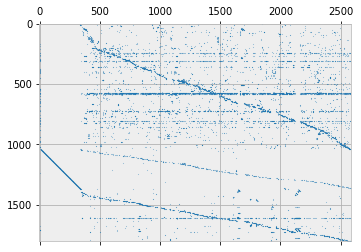

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(s, precision=0.01, markersize=.1)

## Simulating models

In [33]:
model.optimize()

,fluxes,reduced_costs
DM_4crsol_c,0.000219,0.000000
DM_5drib_c,0.000221,0.000000
DM_aacald_c,0.000000,0.000000
DM_amob_c,0.000002,0.000000
DM_mththf_c,0.000440,0.000000
...,...,...
ZN2abcpp,0.000000,-0.008295
ZN2t3pp,0.000000,-0.002074
ZN2tpp,0.000335,0.000000
ZNabcpp,0.000000,-0.008295


Sometimes a solution cannot be found. For example, setting the lower bound of the objective function to a very high value that the model cannot achieve will trigger a warning when trying to optimize the model. Parameters reported from an infeasible model are not meaningful to interpret (except in rare occasions when you may want to figure out why a model is infeasible).

In [34]:
infeasible_model = model.copy()
infeasible_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 100000
sol = infeasible_model.optimize()

cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'
